In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
ches_results = pd.read_excel('../data/ches_scores/LLM scores vs CHES.xlsx')[['Document','Status','Dimension','Expert mean']]

In [3]:
ches_results = ches_results[~ches_results['Status'].isna()]

In [4]:
ches_results

,Document,Status,Dimension,Expert mean
1,CZ 2006 Green,Calibration,EU,6.25
2,CZ 2006 Green,Calibration,TaxSpend,5.67
3,CZ 2006 Green,Calibration,SocialLifestyle,3
4,CZ 2006 Green,Calibration,Immigration,4.75
5,CZ 2006 Green,Calibration,Environment,x
...,...,...,...,...
69,SWE 2010 Moderate,Test,TaxSpend,7.57
70,SWE 2010 Moderate,Test,SocialLifestyle,3.21
71,SWE 2010 Moderate,Test,Immigration,5.36
72,SWE 2010 Moderate,Test,Environment,5.93


In [6]:
llm_results = pd.read_excel('../data/results/test_set_few_shot_results.xlsx')

In [7]:
llm_results

,file,issue,model,score,error_message,prompt,created_at
0,../data/plaintext/1 Test - POR1999 Soc Dem.txt,european_union,gpt-4o,6,NaN,[SystemMessage(content='\n You are an exper...,2024-07-03 14:05:04.181
1,../data/plaintext/1 Test - POR1999 Soc Dem.txt,european_union,gpt-4o,6,NaN,[SystemMessage(content='\n You are an exper...,2024-07-03 14:05:04.181
2,../data/plaintext/1 Test - POR1999 Soc Dem.txt,european_union,gpt-4o,6,NaN,[SystemMessage(content='\n You are an exper...,2024-07-03 14:05:04.181
3,../data/plaintext/1 Test - POR1999 Soc Dem.txt,european_union,gpt-4o,6,NaN,[SystemMessage(content='\n You are highly i...,2024-07-03 14:05:04.181
4,../data/plaintext/1 Test - POR1999 Soc Dem.txt,european_union,gpt-4o,6,NaN,[SystemMessage(content='\n You are highly i...,2024-07-03 14:05:04.181
...,...,...,...,...,...,...,...
1156,../data/plaintext/1 Test - SWE 2010 Moderate.txt,european_union,claude-3-5-sonnet-20240620,6,NaN,[SystemMessage(content='\n You are highly i...,2024-07-03 14:41:45.109
1157,../data/plaintext/1 Test - SWE 2010 Moderate.txt,european_union,claude-3-5-sonnet-20240620,6,NaN,[SystemMessage(content='\n You are highly i...,2024-07-03 14:41:45.109
1158,../data/plaintext/1 Test - SWE 2010 Moderate.txt,european_union,claude-3-5-sonnet-20240620,6,NaN,[SystemMessage(content='\n You are a profes...,2024-07-03 14:41:45.109
1159,../data/plaintext/1 Test - SWE 2010 Moderate.txt,european_union,claude-3-5-sonnet-20240620,6,NaN,[SystemMessage(content='\n You are a profes...,2024-07-03 14:41:45.109


In [8]:
issue_map = {'european_union': 'EU',
             'taxation': 'TaxSpend',
             'lifestyle': 'SocialLifestyle',
             'immigration': 'Immigration',
             'environment': 'Environment',
             'decentralization': 'Regions'}

In [9]:
llm_results['ches_issue'] = llm_results['issue'].map(issue_map)

In [10]:
llm_results

,file,issue,model,score,error_message,prompt,created_at,ches_issue
0,../data/plaintext/1 Test - POR1999 Soc Dem.txt,european_union,gpt-4o,6,NaN,[SystemMessage(content='\n You are an exper...,2024-07-03 14:05:04.181,EU
1,../data/plaintext/1 Test - POR1999 Soc Dem.txt,european_union,gpt-4o,6,NaN,[SystemMessage(content='\n You are an exper...,2024-07-03 14:05:04.181,EU
2,../data/plaintext/1 Test - POR1999 Soc Dem.txt,european_union,gpt-4o,6,NaN,[SystemMessage(content='\n You are an exper...,2024-07-03 14:05:04.181,EU
3,../data/plaintext/1 Test - POR1999 Soc Dem.txt,european_union,gpt-4o,6,NaN,[SystemMessage(content='\n You are highly i...,2024-07-03 14:05:04.181,EU
4,../data/plaintext/1 Test - POR1999 Soc Dem.txt,european_union,gpt-4o,6,NaN,[SystemMessage(content='\n You are highly i...,2024-07-03 14:05:04.181,EU
...,...,...,...,...,...,...,...,...
1156,../data/plaintext/1 Test - SWE 2010 Moderate.txt,european_union,claude-3-5-sonnet-20240620,6,NaN,[SystemMessage(content='\n You are highly i...,2024-07-03 14:41:45.109,EU
1157,../data/plaintext/1 Test - SWE 2010 Moderate.txt,european_union,claude-3-5-sonnet-20240620,6,NaN,[SystemMessage(content='\n You are highly i...,2024-07-03 14:41:45.109,EU
1158,../data/plaintext/1 Test - SWE 2010 Moderate.txt,european_union,claude-3-5-sonnet-20240620,6,NaN,[SystemMessage(content='\n You are a profes...,2024-07-03 14:41:45.109,EU
1159,../data/plaintext/1 Test - SWE 2010 Moderate.txt,european_union,claude-3-5-sonnet-20240620,6,NaN,[SystemMessage(content='\n You are a profes...,2024-07-03 14:41:45.109,EU


In [11]:
llm_results['ches_file'] = llm_results.file.apply(lambda x: x.split('/')[-1].split('-')[-1].split('.')[0].strip())

In [12]:
llm_results['ches_file']

0         POR1999 Soc Dem
1         POR1999 Soc Dem
2         POR1999 Soc Dem
3         POR1999 Soc Dem
4         POR1999 Soc Dem
              ...        
1156    SWE 2010 Moderate
1157    SWE 2010 Moderate
1158    SWE 2010 Moderate
1159    SWE 2010 Moderate
1160    SWE 2010 Moderate
Name: ches_file, Length: 1161, dtype: object

In [13]:
merged_results = llm_results.merge(ches_results[['Document', 'Dimension', 'Expert mean']], left_on=['ches_file','ches_issue'], right_on=['Document', 'Dimension'], how='left', copy=False)

In [14]:
merged_results

,file,issue,model,score,error_message,prompt,created_at,ches_issue,ches_file,Document,Dimension,Expert mean
0,../data/plaintext/1 Test - POR1999 Soc Dem.txt,european_union,gpt-4o,6,NaN,[SystemMessage(content='\n You are an exper...,2024-07-03 14:05:04.181,EU,POR1999 Soc Dem,NaN,NaN,NaN
1,../data/plaintext/1 Test - POR1999 Soc Dem.txt,european_union,gpt-4o,6,NaN,[SystemMessage(content='\n You are an exper...,2024-07-03 14:05:04.181,EU,POR1999 Soc Dem,NaN,NaN,NaN
2,../data/plaintext/1 Test - POR1999 Soc Dem.txt,european_union,gpt-4o,6,NaN,[SystemMessage(content='\n You are an exper...,2024-07-03 14:05:04.181,EU,POR1999 Soc Dem,NaN,NaN,NaN
3,../data/plaintext/1 Test - POR1999 Soc Dem.txt,european_union,gpt-4o,6,NaN,[SystemMessage(content='\n You are highly i...,2024-07-03 14:05:04.181,EU,POR1999 Soc Dem,NaN,NaN,NaN
4,../data/plaintext/1 Test - POR1999 Soc Dem.txt,european_union,gpt-4o,6,NaN,[SystemMessage(content='\n You are highly i...,2024-07-03 14:05:04.181,EU,POR1999 Soc Dem,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,../data/plaintext/1 Test - SWE 2010 Moderate.txt,european_union,claude-3-5-sonnet-20240620,6,NaN,[SystemMessage(content='\n You are highly i...,2024-07-03 14:41:45.109,EU,SWE 2010 Moderate,SWE 2010 Moderate,EU,6.33
1157,../data/plaintext/1 Test - SWE 2010 Moderate.txt,european_union,claude-3-5-sonnet-20240620,6,NaN,[SystemMessage(content='\n You are highly i...,2024-07-03 14:41:45.109,EU,SWE 2010 Moderate,SWE 2010 Moderate,EU,6.33
1158,../data/plaintext/1 Test - SWE 2010 Moderate.txt,european_union,claude-3-5-sonnet-20240620,6,NaN,[SystemMessage(content='\n You are a profes...,2024-07-03 14:41:45.109,EU,SWE 2010 Moderate,SWE 2010 Moderate,EU,6.33
1159,../data/plaintext/1 Test - SWE 2010 Moderate.txt,european_union,claude-3-5-sonnet-20240620,6,NaN,[SystemMessage(content='\n You are a profes...,2024-07-03 14:41:45.109,EU,SWE 2010 Moderate,SWE 2010 Moderate,EU,6.33


In [15]:
merged_results[merged_results['Expert mean'].isna()].ches_file.value_counts()

ches_file
POR1999 Soc Dem    162
FR 2002 FN txt     162
Name: count, dtype: int64

In [52]:
cleaned_results = merged_results[~merged_results['Expert mean'].isna()]

In [53]:
cleaned_results = cleaned_results.drop(columns=['Document', 'Dimension', 'file','issue','error_message','created_at'])

In [54]:
cleaned_results

,model,score,prompt,ches_issue,ches_file,Expert mean
162,gpt-4o,2,[SystemMessage(content='\n You are an exper...,EU,BUL 2014 Attack,1.5
163,gpt-4o,2,[SystemMessage(content='\n You are an exper...,EU,BUL 2014 Attack,1.5
164,gpt-4o,1,[SystemMessage(content='\n You are an exper...,EU,BUL 2014 Attack,1.5
165,gpt-4o,1,[SystemMessage(content='\n You are highly i...,EU,BUL 2014 Attack,1.5
166,gpt-4o,1,[SystemMessage(content='\n You are highly i...,EU,BUL 2014 Attack,1.5
...,...,...,...,...,...,...
1156,claude-3-5-sonnet-20240620,6,[SystemMessage(content='\n You are highly i...,EU,SWE 2010 Moderate,6.33
1157,claude-3-5-sonnet-20240620,6,[SystemMessage(content='\n You are highly i...,EU,SWE 2010 Moderate,6.33
1158,claude-3-5-sonnet-20240620,6,[SystemMessage(content='\n You are a profes...,EU,SWE 2010 Moderate,6.33
1159,claude-3-5-sonnet-20240620,6,[SystemMessage(content='\n You are a profes...,EU,SWE 2010 Moderate,6.33


In [55]:
cleaned_results['difference'] = pd.to_numeric(cleaned_results['score'], errors='coerce') - pd.to_numeric(cleaned_results['Expert mean'], errors='coerce')

### Trimming out the ones claude couldn't finish

In [56]:
cleaned_results = cleaned_results[cleaned_results.ches_file != 'SWE 2010 Moderate'].copy()

<Axes: >

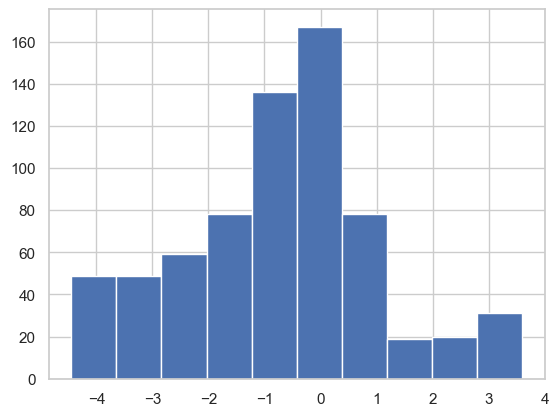

In [57]:
cleaned_results['difference'].hist()

In [58]:
sns.set_theme(style="whitegrid")

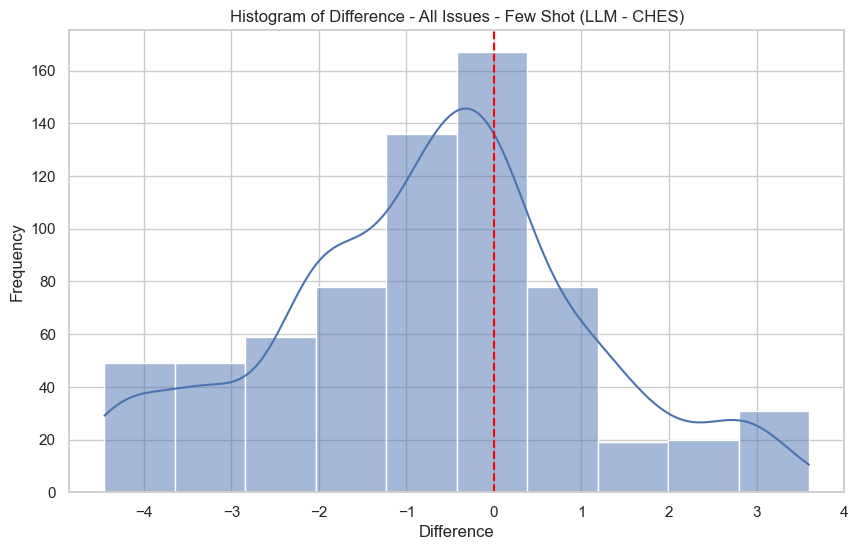

In [59]:

# 1. Histogram of 'difference'
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_results['difference'], bins=10, kde=True)
plt.title('Histogram of Difference - All Issues - Few Shot (LLM - CHES)')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.axvline(x=0, linestyle='--', color='red')
plt.show()

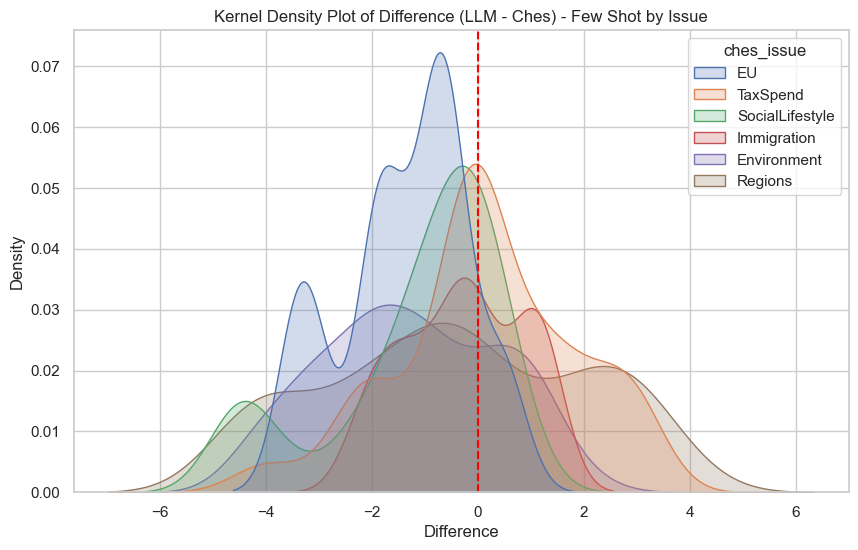

In [60]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=cleaned_results, x='difference', hue='ches_issue', fill=True)
plt.title('Kernel Density Plot of Difference (LLM - Ches) - Few Shot by Issue')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.axvline(x=0, linestyle='--', color='red')
plt.show()

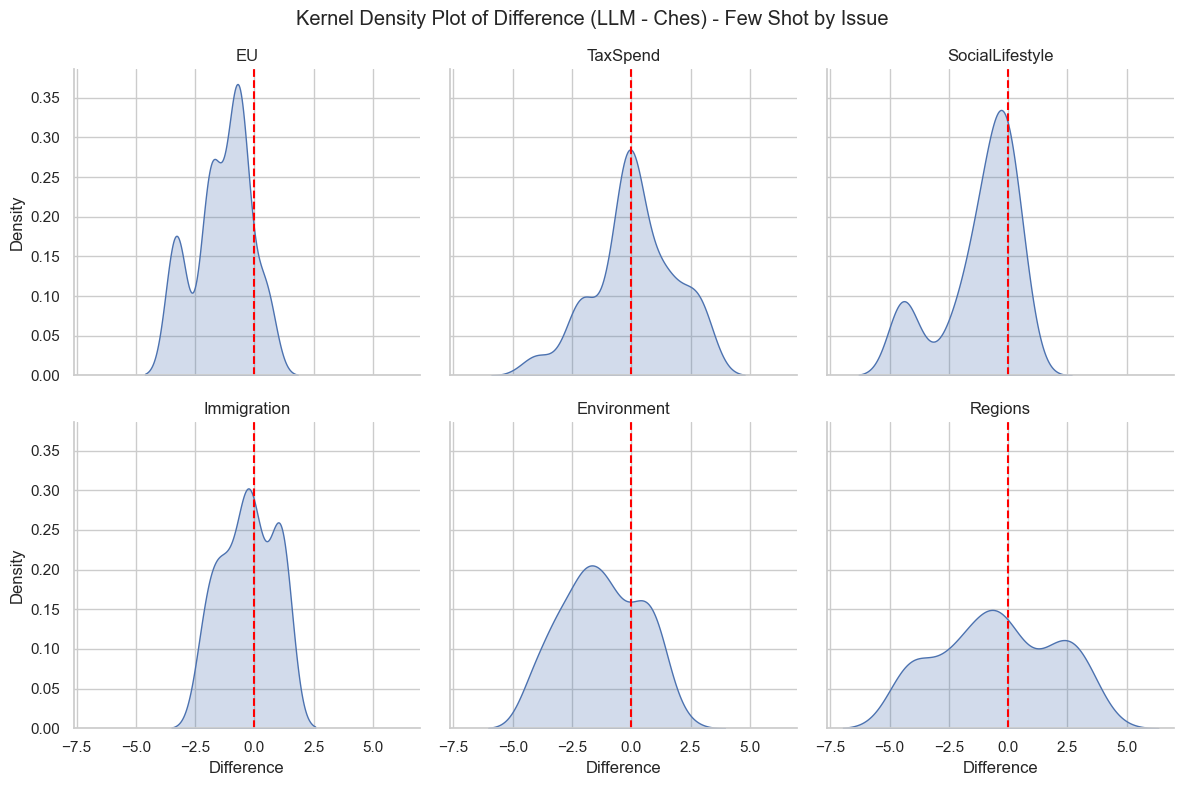

In [61]:
# Create the FacetGrid
g = sns.FacetGrid(cleaned_results, col="ches_issue", col_wrap=3, height=4, sharex=True, sharey=True)

# Map the kdeplot to each facet
g.map(sns.kdeplot, "difference", fill=True)

# Add titles and adjust the layout
g.set_titles("{col_name}")
g.set_axis_labels("Difference", "Density")
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Kernel Density Plot of Difference (LLM - Ches) - Few Shot by Issue')
g.map(plt.axvline, x=0, linestyle='--', color='red')

# Show the plot
plt.show()

In [62]:
cleaned_results.model

162                         gpt-4o
163                         gpt-4o
164                         gpt-4o
165                         gpt-4o
166                         gpt-4o
                   ...            
1129    claude-3-5-sonnet-20240620
1130    claude-3-5-sonnet-20240620
1131    claude-3-5-sonnet-20240620
1132    claude-3-5-sonnet-20240620
1133    claude-3-5-sonnet-20240620
Name: model, Length: 810, dtype: object

In [63]:
cleaned_results.model = cleaned_results.model.map({'gemini-1.5-pro-001': 'Gemini 1.5 Pro',
                           'claude-3-5-sonnet-20240620': 'Claude 3.5 Sonnet',
                           'gpt-4o': 'GPT-4o',})

In [64]:
cleaned_results.model.value_counts()

model
GPT-4o               270
Gemini 1.5 Pro       270
Claude 3.5 Sonnet    270
Name: count, dtype: int64

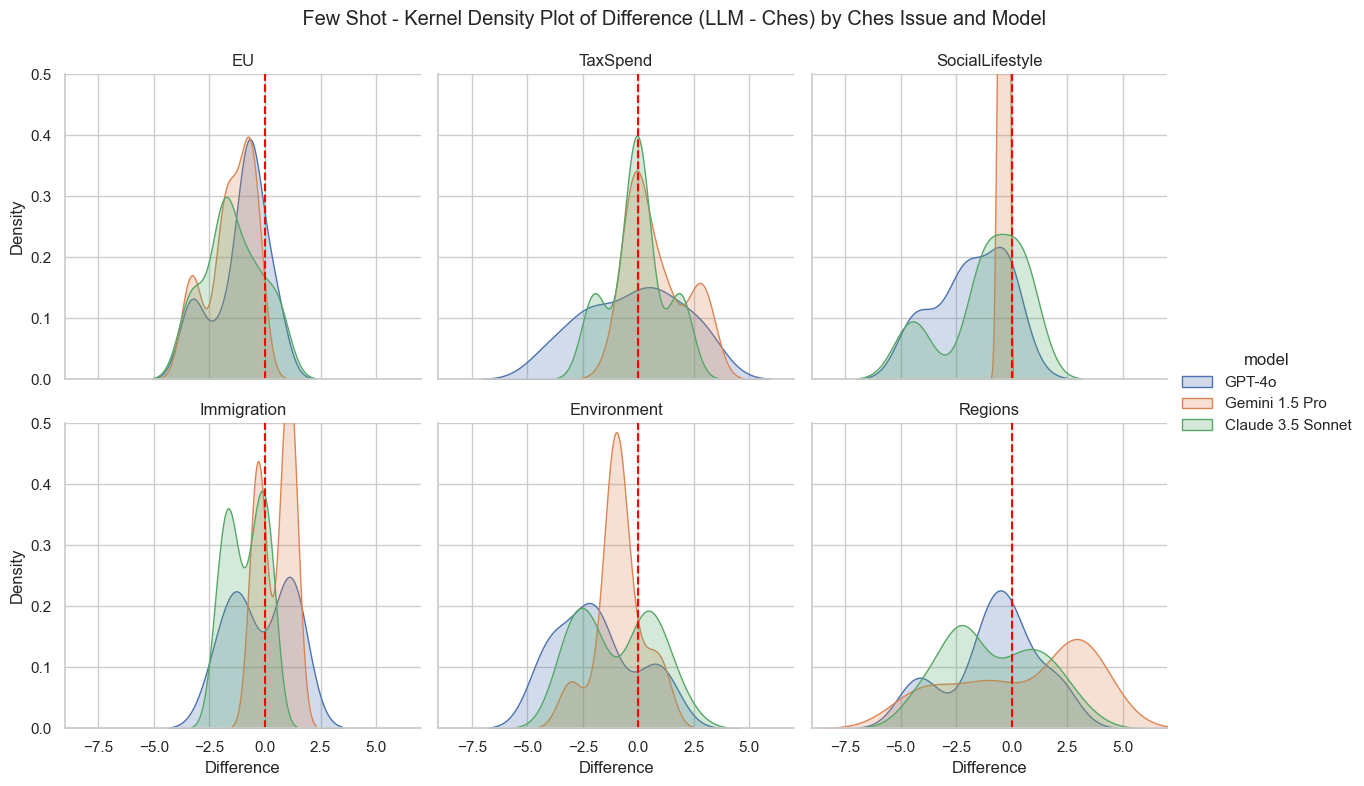

In [65]:
g = sns.FacetGrid(cleaned_results, col="ches_issue", hue="model", col_wrap=3, height=4, sharex=True, sharey=True)

# Map the kdeplot to each facet
g.map(sns.kdeplot, "difference", fill=True)

# Add a vertical line at 0 to each facet
for ax in g.axes.flat:
    ax.axvline(x=0, linestyle='--', color='red')

# Add titles and adjust the layout
g.set_titles("{col_name}")
g.set_axis_labels("Difference", "Density")
plt.subplots_adjust(top=0.9)
g.figure.suptitle(' Few Shot - Kernel Density Plot of Difference (LLM - Ches) by Ches Issue and Model')

# Add legend
g.add_legend()

g.set(xlim=(-9, 7))
g.set(ylim=(0, 0.5))

# Show the plot
plt.show()

In [ ]:
cleaned_results.to_excel('../data/results/ches_comparison_results.xlsx', index=False)